In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from jupyterthemes import jtplot
jtplot.style()

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))

In [3]:
noise

array([ 0.40364118,  1.14200493,  0.42070779, ..., -0.62878125,
       -0.76953861, -0.25637736])

y = mx + b

b = 5

In [4]:
y_true = (0.5 * x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns= ['Y True'])

In [6]:
my_data = pd.concat([x_df, y_df], axis=1)

In [7]:
my_data.head()

,X Data,Y True
0,0.00000,5.403641
1,0.00001,6.142010
2,0.00002,5.420718
3,0.00003,4.716722
4,0.00004,5.818413


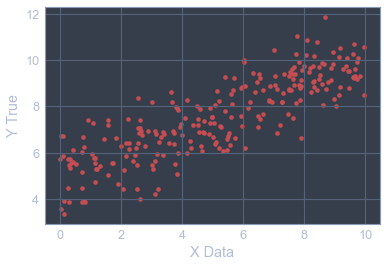

In [8]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y True', color='r')

In [9]:
batch_size = 8 # Let's get 8 points at a time

In [10]:
m = tf.Variable(0.0)
b = tf.Variable(0.0)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
x_ph = tf.placeholder("float", [batch_size])
y_ph = tf.placeholder("float", [batch_size])

In [12]:
y_model = m * x_ph + b

In [13]:
loss_fn = tf.reduce_sum((y_ph - y_model) ** 2)

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss_fn)

In [15]:
init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    
    for i in range(batches):
        rand_idx = np.random.randint(len(x_data),size = batch_size)
        feed = {x_ph : x_data[rand_idx], y_ph: y_true[rand_idx]}
        sess.run(optimizer, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])

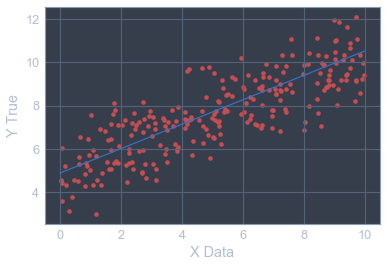

In [17]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y True', color='r')
x = np.linspace(0, 10, 2)
y = model_m * x + model_b
plt.plot(x, y)

In [18]:
model_m

0.5652509

In [19]:
model_b

4.8720837

## TF Estimator API

In [20]:
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [21]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmp73oen9el', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12edd7c88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_eval, y_train, y_eval = train_test_split(
    x_data,
    y_true,
    test_size = 0.3,
    random_state = 101
)

In [24]:
print(x_train.shape, x_eval.shape)

(700000,) (300000,)


In [25]:
input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train},
    y_train,
    batch_size=8,
    num_epochs=None,
    shuffle=True
)

Set `shuffle` to `False`

Set `num_epochs` to `1000`

In [26]:
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train},
    y_train,
    batch_size=8,
    num_epochs=1000,
    shuffle=False
)

Configure function to evaluate on our non-training data

In [27]:
eval_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_eval},
    y_eval,
    batch_size=8,
    num_epochs=1000,
    shuffle=False
)

In [28]:
estimator.train(
    input_fn=input_func,
    steps=1000
)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmp73oen9el/model.ckpt.
INFO:tensorflow:loss = 474.5442, step = 1
INFO:tensorflow:global_step/sec: 1009.23
INFO:tensorflow:loss = 38.588203, step = 101 (0.100 sec)
INFO:tensorflow:global_step/sec: 1308.97
INFO:tensorflow:loss = 15.581287, step = 201 (0.076 sec)
INFO:tensorflow:global_step/sec: 1313.24
INFO:tensorflow:loss = 13.628981, step = 301 (0.076 sec)
INFO:tensor

In [29]:
train_metics = estimator.evaluate(
    input_fn = train_input_func,
    steps=1000
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-13T19:48:31Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmp73oen9el/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-13-19:48:32
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0789459, global_step = 1000, label

In [30]:
eval_metics = estimator.evaluate(
    input_fn = eval_input_func,
    steps=1000
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-13T19:48:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmp73oen9el/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-13-19:48:34
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0705955, global_step = 1000, label/mean = 7.4907413, loss = 8.564764, prediction/mean = 7.3760314
INFO:tensorflow:Saving 

In [31]:
print('TRAIN Metrics')
print(train_metics)
print('EVAL metrics')
print(eval_metics)

TRAIN Metrics
{'average_loss': 1.0789459, 'label/mean': 7.495742, 'loss': 8.631567, 'prediction/mean': 7.3977365, 'global_step': 1000}
EVAL metrics
{'average_loss': 1.0705955, 'label/mean': 7.4907413, 'loss': 8.564764, 'prediction/mean': 7.3760314, 'global_step': 1000}


Predict new values

In [32]:
brand_new_data = np.linspace(0, 10, 10)
brand_new_data

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [33]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn(
    {'x': brand_new_data},
    shuffle=False
)

In [37]:
predictions = [pred['predictions'] for pred in estimator.predict(input_fn=input_fn_predict)]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmp73oen9el/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Plot our estimations above our sample

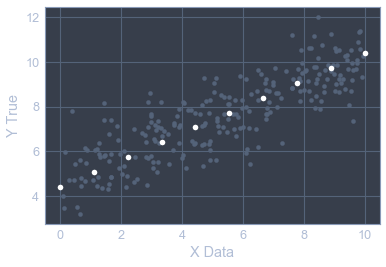

In [51]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y True')
plt.plot(brand_new_data, predictions, 'o', color='white')